<a href="https://colab.research.google.com/github/MehrdadJalali-AI/BlackHole/blob/main/Node_Statistics_BH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

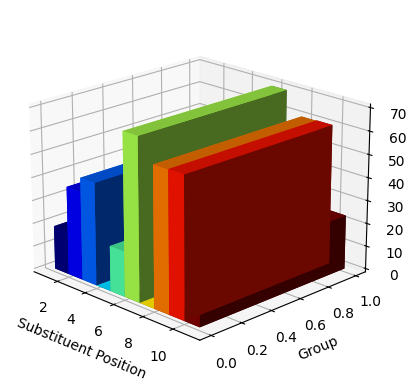

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Number of bars
n = 10

# Generate random data for demonstration
x = np.linspace(1, 10, n)
y = np.zeros(n)
z = np.zeros(n)

dx = np.ones(n)  # Width of the bars along the x-axis
dy = np.ones(n)  # Depth of the bars along the y-axis
dz = np.random.rand(n) * 100  # Heights of the bars

# Create a figure for plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set colors for each bar
colors = plt.cm.jet(np.linspace(0, 1, n))

# Plotting each bar
for i in range(n):
    ax.bar3d(x[i], y[i], z[i], dx[i], dy[i], dz[i], color=colors[i])

# Setting the labels
ax.set_xlabel('Substituent Position')
ax.set_ylabel('Group')
ax.set_zlabel('BDE Value')

# Set the view angle for better visualization
ax.view_init(elev=20, azim=-45)

# Show the plot
plt.show()


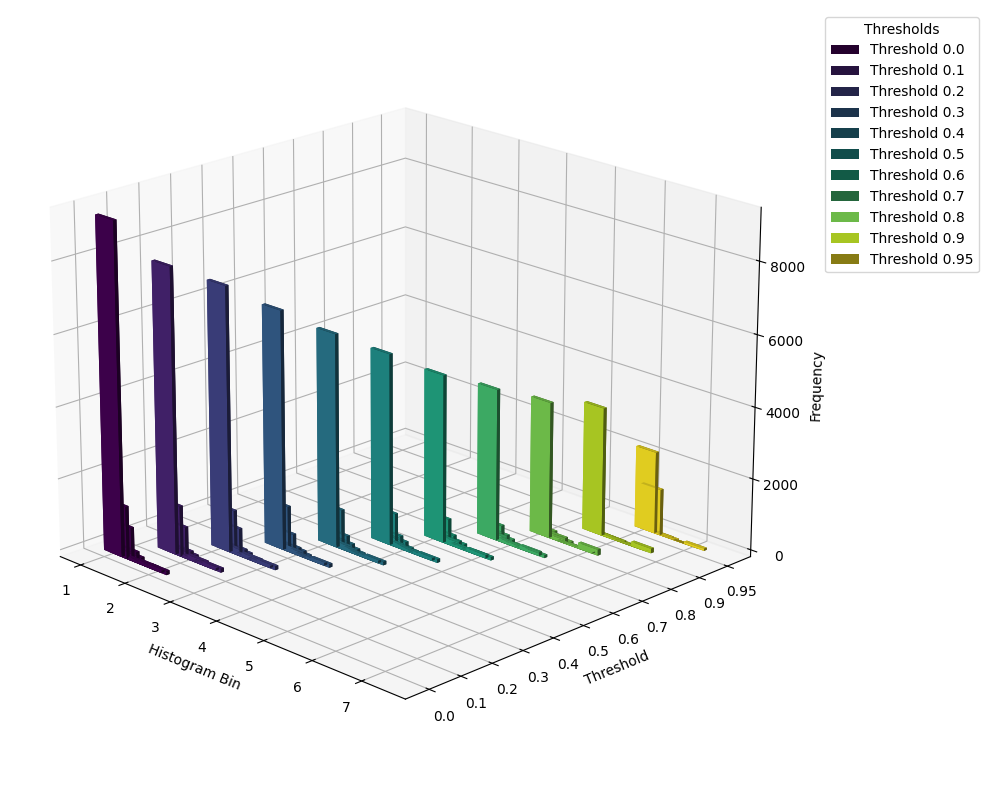

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

# Directory containing the CSV files
directory_path = '/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics'

# Thresholds explicitly defined for sequential order
thresholds = [f'{i/10:.1f}' for i in range(10)] + ['0.95']

# Generate the full file paths
file_paths = [os.path.join(directory_path, f'BH_{threshold}.csv') for threshold in thresholds]

# Function to read data and calculate histogram
def get_degree_distribution(file_path):
    try:
        data = pd.read_csv(file_path)
        if 'Degree' in data.columns:
            counts, _ = np.histogram(data['Degree'], bins=10)
            return counts
        else:
            print(f"'Degree' column not found in {file_path}")
            return None
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Collect all histograms
degree_distributions = [get_degree_distribution(path) for path in file_paths]

# Set up the plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.viridis(np.linspace(0, 1, len(degree_distributions)))

# Plotting parameters
dx = 0.4  # Width of bars
dy = 0.1  # Depth of bars
z = np.zeros(10)  # Base level for bars

# Plot histograms in 3D
for i, counts in enumerate(degree_distributions):
    if counts is not None:
        x = np.linspace(1 + i * 0.5, 1 + i * 0.5 + 1, 10)  # Adjust x for each histogram to offset slightly
        y = np.full(10, i)  # Y position set to the index of the threshold for uniform spacing
        ax.bar3d(x, y, z, dx, dy, counts, color=colors[i], label=f'Threshold {thresholds[i]}')

# Labels and legend
ax.set_xlabel('Histogram Bin')
ax.set_ylabel('Threshold')
ax.set_zlabel('Frequency')

# Customizing the Y-axis to show thresholds as labels
ax.set_yticks(range(len(thresholds)))  # Set y-ticks to correspond to the list of thresholds
ax.set_yticklabels(thresholds)  # Set y-tick labels to show the actual threshold values

# Legend
ax.legend(title="Thresholds", bbox_to_anchor=(1.05, 1), loc='upper left')

# Viewing angle
ax.view_init(elev=20, azim=-45)

plt.show()


In [7]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/MOF/Black_Hole/Implementation/Data/Node_Statistics')

Mounted at /content/drive
